<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

---
# 2. Problem Statement
---
This **dataset** consists of **advertising budgets** for **TV, radio and newspaper media** for **determining the sales of the product**.

 

Your role as **Data Scientist** is to find: 

- A **function** for **sales prediction** of a product with respect to **advertising budgets** and **visualize** relationship between **features** and **response**. 

- Also determine which **media** contributes to **sales**.



### 3.2. **Importing Packages** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#------------------------------------------------------------------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The adverstising dataset captures sales generated with respect to advertisement spends across multiple channles like **radio**, **tv** and **newspaper**.

- The Data can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 200 | 4 | 7.80 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **TV** | Spends on TV |
|02| **radio** | Spends on radio | 
|03|**newspaper**|Spends on newspaper|
|04|**sales**|No. of units sold (in Thousands)|

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0) 
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 4)


,TV,radio,newspaper,sales
1,230.10000,37.80000,69.20000,22.10000
2,44.50000,39.30000,45.10000,10.40000
3,17.20000,45.90000,69.30000,9.30000
4,151.50000,41.30000,58.50000,18.50000
5,180.80000,10.80000,58.40000,12.90000


- The dataset contains **200** rows and **4** columns. 

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
data.describe()

,TV,radio,newspaper,sales
count,200.00000,200.00000,200.00000,200.00000
mean,147.04250,23.26400,30.55400,14.02250
std,85.85424,14.84681,21.77862,5.21746
min,0.70000,0.00000,0.30000,1.60000
25%,74.37500,9.97500,12.75000,10.37500
50%,149.75000,22.90000,25.75000,12.90000
75%,218.82500,36.52500,45.10000,17.40000
max,296.40000,49.60000,114.00000,27.00000


**Observation:**

- The **average** value of **sales** is **14k** units.

- The **maximum** value of **sales** is **27k** units.

- The **maximum** amount spend on **TV**. **radio** and **newspaper** is found to be **296**, **50** and **114** dollars respectively

- The **least** amount on advertising is spend on **radio**


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

Note : To check your profiling please **uncomment** the code and run it

In [6]:
import pandas_profiling as pp

In [7]:
# profile = pp.ProfileReport(df = data)
# profile.to_file('Pre Profiling Report.html')
# print('Accomplished!')

**Observation:**

- Report show that there are **4 features** which **are numerical**.

- There are **no missing values**.

- **TV** has the most unique values 

- No **duplicates** has been found. 

- The minimum **sale** is **1.6** units which happened only once.  

- _Sales_ seems to be __normally distributed__.


- Spending on _newspaper advertisement_ seems to be __right skewed__.


- Most of the spends on _newspaper_ is __fairly low__ where as spend on _radio and tv_ seems to be __uniformly distributed__.


- Spends on _tv_ are __comparatively higher__ than spend on _radio and newspaper_.

- For full details checkout the report.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

### Is there a relationship between sales and spends on various advertising channels?

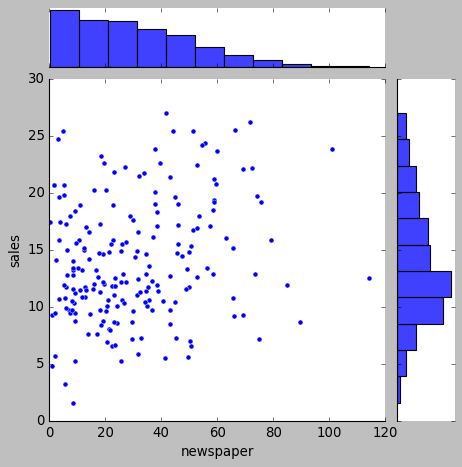

In [11]:
%matplotlib inline
plt.style.use("classic")

# sns.jointplot("newspaper", "sales", data=data, kind='reg')
sns.jointplot("newspaper", "sales", data=data)
plt.show()

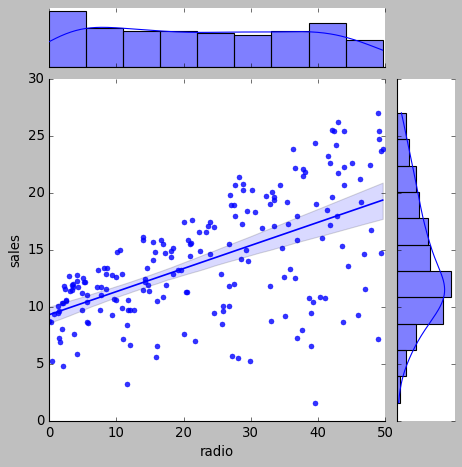

In [12]:
plt.style.use("classic")
sns.jointplot("radio", "sales", data=data, kind='reg')
plt.show()

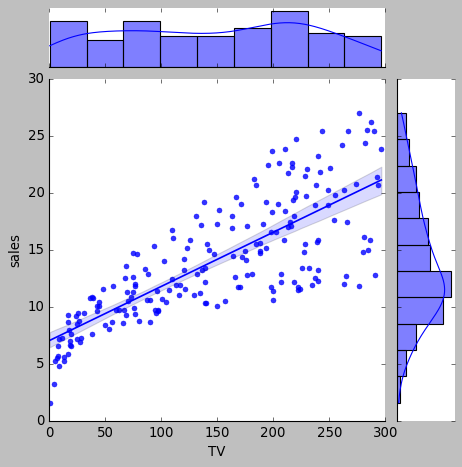

In [13]:
plt.style.use("classic")
sns.jointplot("TV", "sales", data=data, kind='reg')
plt.show()

__Observation__<br/>

- _Sales and spend on newpaper_ is __not__ highly correlaed where as _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

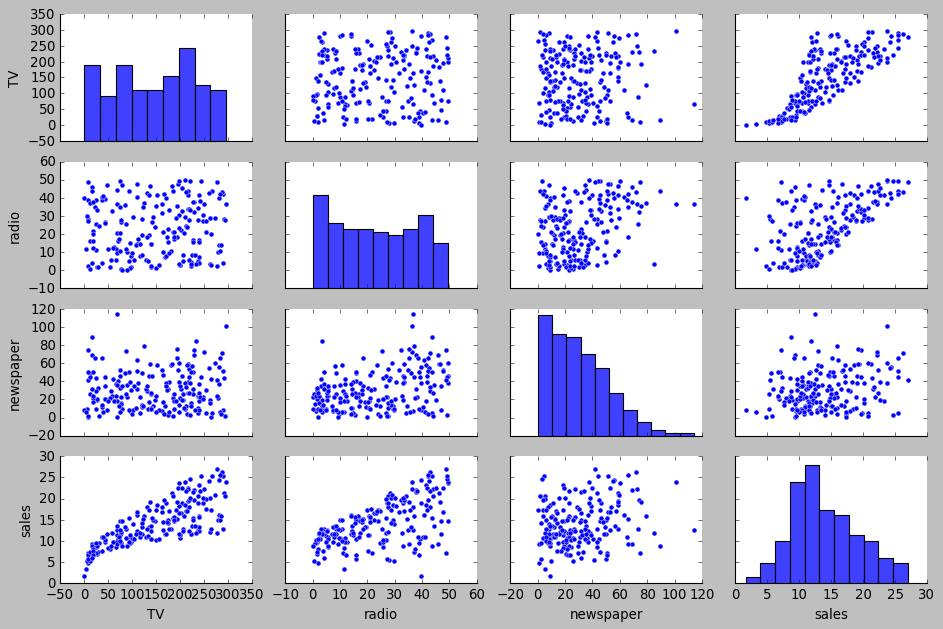

In [15]:
sns.pairplot(data, size = 2, aspect = 1.5)
plt.show()

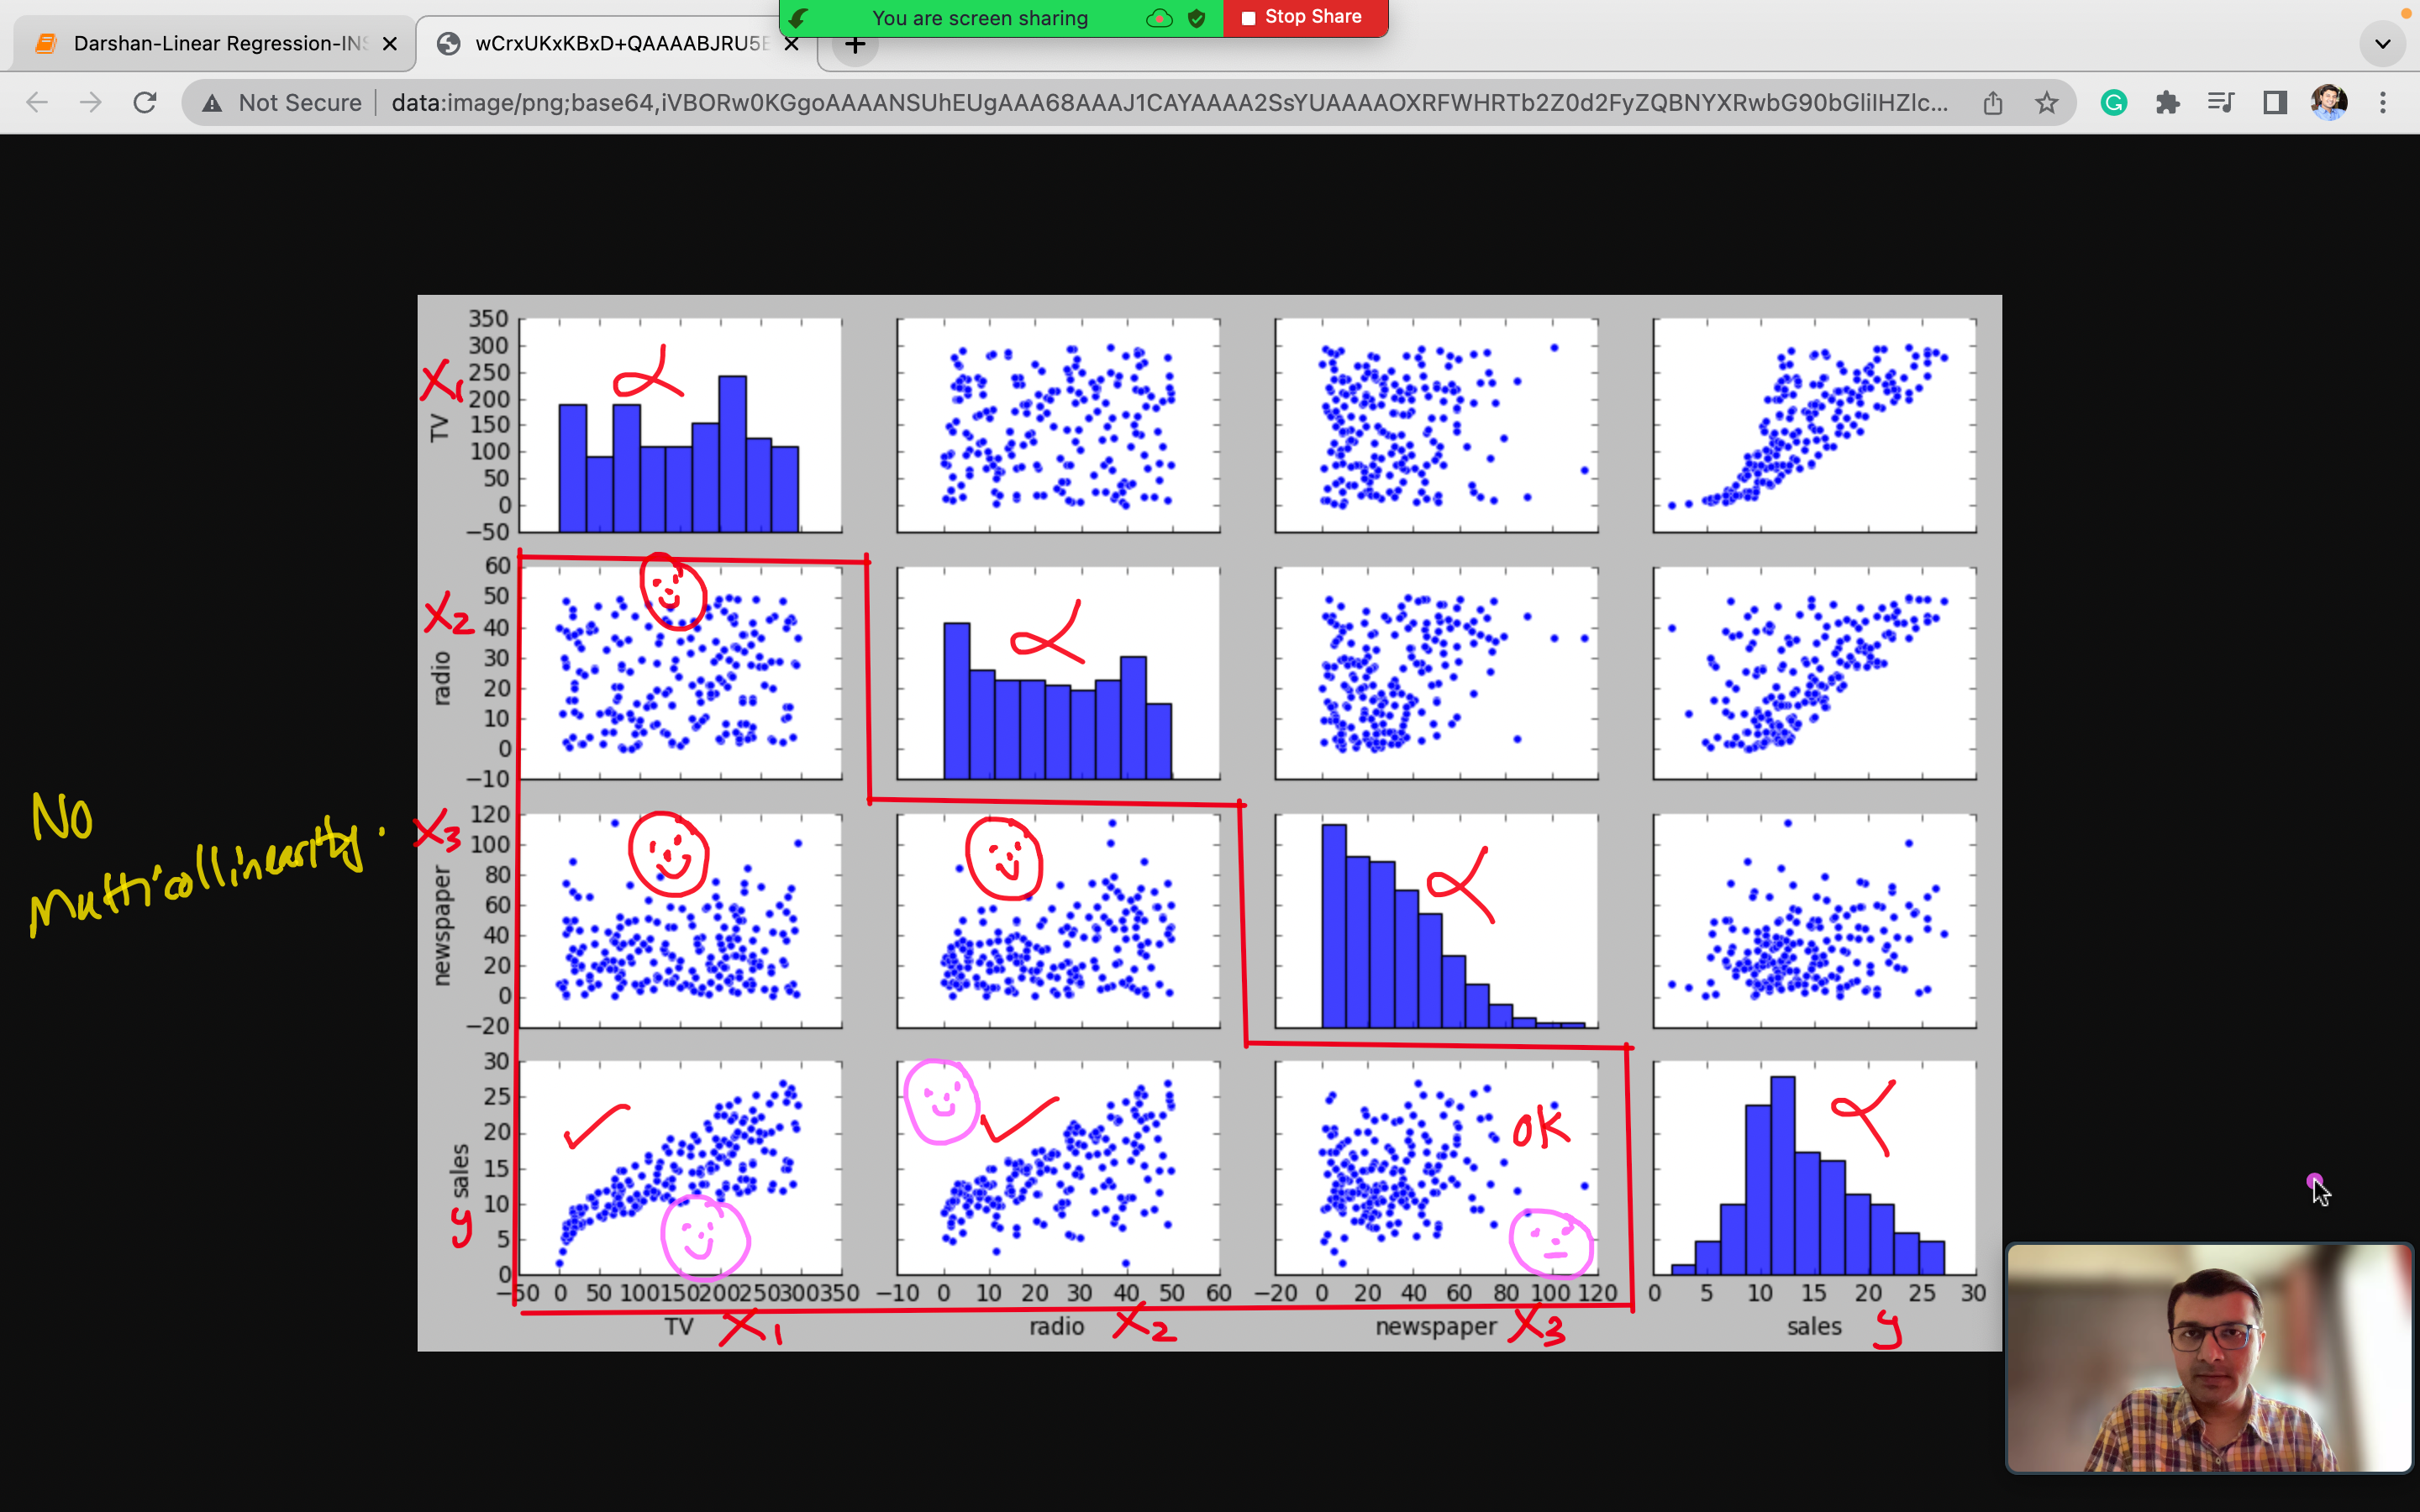

### Calculating and plotting heatmap correlation

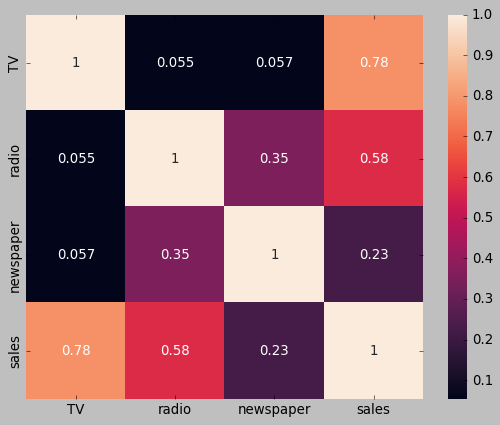

In [16]:
sns.heatmap(data.corr(), annot=True );

__Observation__

- **Strong** relationship between **TV ads** and **sales**


- **Weak** relationship between **Radio ads** and **sales**


- **Very weak** to **no** relationship between **Newspaper ads** and **sales**


- **No correlation** between the independent variables **TV** and **Radio** proves the assumption of **Multicollinearity**


- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.


- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.



**Note:** These are few question we need to analyze before moving further and if you want to dig deeper into this, feel free to do so...

In [17]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.10000,37.80000,69.20000
2,44.50000,39.30000,45.10000
3,17.20000,45.90000,69.30000
4,151.50000,41.30000,58.50000
5,180.80000,10.80000,58.40000


In [18]:
y = data.sales
y.head()

1   22.10000
2   10.40000
3    9.30000
4   18.50000
5   12.90000
Name: sales, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


<a name = Section7></a>

---
# **7. Post Data Processing**
---



### **7.1 Data Standardization**

__Standardization__ 
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[feature_cols]  = sc.fit_transform(X_train[feature_cols]) # study_change
X_test[feature_cols] = sc.transform(X_test[feature_cols]) # change/give exam

In [22]:
X_train.head()

,TV,radio,newspaper
109,-1.47861,-1.50741,-0.20710
108,-0.59391,-1.51399,-0.32129
190,-1.41452,-0.73731,-0.31177
15,0.70739,0.63175,0.76356
57,-1.54500,0.31581,0.54468


In [25]:
X_train.describe()

,TV,radio,newspaper
count,160.00000,160.00000,160.00000
mean,0.00000,0.00000,0.00000
std,1.00314,1.00314,1.00314
min,-1.62053,-1.53374,-1.41090
25%,-0.85000,-0.92161,-0.82803
50%,-0.02738,0.06241,-0.20710
75%,0.87134,0.89010,0.72073
max,1.76377,1.71779,3.37576


In [24]:
X_test.head()

,TV,radio,newspaper
59,0.78407,1.73095,0.36863
41,0.68908,-0.06594,0.07839
35,-0.53325,-1.44159,-1.07307
103,1.57836,-0.86895,-0.40694
185,1.27621,-0.13176,0.00226


In [26]:
X_test.describe()

,TV,radio,newspaper
count,40.00000,40.00000,40.00000
mean,0.27182,-0.01246,0.14310
std,0.87373,0.87753,1.16612
min,-1.40422,-1.44159,-1.25388
25%,-0.37875,-0.66491,-0.66268
50%,0.38006,-0.14164,-0.06435
75%,0.92656,0.61201,0.68386
max,1.69853,1.73095,3.99907


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Linear Regression model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **MSE**, **MAE** and **RMSE** scores.

- We will do **feature selection** and see if the scores improves. 

- We will also add a new categorical feature **Area** and assign values randomly and see if we can improve the scores.

### **8.1 Linear regression in scikit-learn**

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

In [28]:
lr

LinearRegression()

### **8.2 Interpreting Model Coefficients**

In [29]:
print('Intercept:',lr.intercept_)    # print the intercept i.e. c
print('Coefficients:',lr.coef_)  # slope i.e. m

Intercept: 13.811250000000001
Coefficients: [4.09287129 2.7126018  0.05435329]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [30]:
feature_cols

['TV', 'radio', 'newspaper']

In [31]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'TV', 'radio', 'newspaper']

In [32]:
coef = lr.coef_.tolist()            
coef

[4.092871292096014, 2.712601798839935, 0.054353293543480063]

In [33]:
coef.insert(0, lr.intercept_)
coef

[13.811250000000001,
 4.092871292096014,
 2.712601798839935,
 0.054353293543480063]

In [34]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 13.811250000000001
TV 4.092871292096014
radio 2.712601798839935
newspaper 0.054353293543480063


__y = 13.811250000000001 + 4.092871292096014 `*` TV + 2.712601798839935 `*` radio + 0.054353293543480063 `*` newspaper__

How do we interpret the TV coefficient (_0.77081_)

- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.

- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:

- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

### **8.3 Using the Model for Prediction**

In [35]:
y_pred_train = lr.predict(X_train)  

In [36]:
y_pred_test = lr.predict(X_test)                                                           # make predictions on the testing set

Let's Plot and see how our model is predicting with the test data

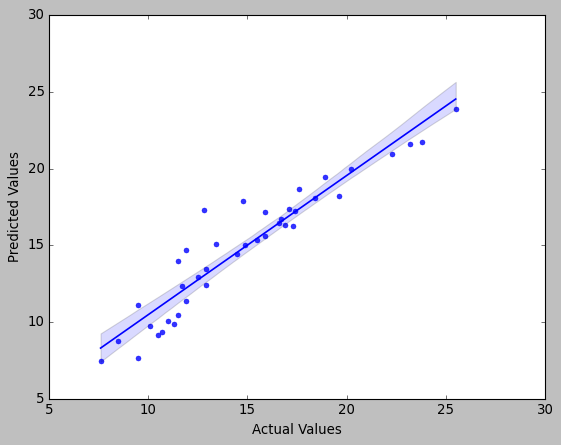

In [38]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## **8.4 Model evaluation** 

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [41]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.328850246099838
MAE for test set is 1.0402154012924723


In [42]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [43]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 3.016830607659677
MSE for test set is 1.9918855518287912


In [44]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [45]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.736902590147092
RMSE for test set is 1.411341755858159


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 

- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.

- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.

### **8.5 Model Evaluation using R-squared and Adjusted R-squared value**

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8959372632325174
R2 score for test set is 0.8927605914615383


In [48]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8939360567562197
Adjusted R2 score for test set is 0.8838239740833331


**Observation**

- The **R-squared** value and **Adjusted R-squared** values for the **training** set is found to be **0.8968** and **0.8934** respectively

- The **R-squared** value and **Adjusted R-squared** values for the **test** set is found to be **0.8944** and **0.8788** respectively

## **8.6 Feature Selection**

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.

- Let's check whether __"newspaper"__ improve the quality of our predictions or not.

To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.


In [49]:
feature_cols = ['TV','radio']
X = data[feature_cols]  
y = data.sales

In [50]:
X.columns

Index(['TV', 'radio'], dtype='object')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

In [53]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test) 

In [54]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.7376069405545282
RMSE for test set is 1.398292489077775


In [55]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8958528468776601
R2 score for test set is 0.8947344950027066


In [56]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8945261315512608
Adjusted R2 score for test set is 0.8890444677055557


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.271182__.

- _After_ discarding 'newspaper' column, RMSE comes to be __0.268675__.

    - As you can see there is __no significant improvement__ in the quality, therefore, the 'newspaper' column shouldn't be discarded.
    
    - But if in some other case if there is significant decrease in the RMSE, then you must discard that feature.

- Give a try to other __features__ and check the RMSE score for each one.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated about the features** which to **retain** and which to **discard**.

